# Кластеризация координат в Foursquare

## Чтение данных из .dat файла

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
with open('checkins.dat', 'r') as file1:
    with open('checkins-new.dat', 'w') as file2:
        for index, line in enumerate (file1):
            newLine=line.replace(' ', '').replace('|',',')
            if (index!=1):
                file2.write(newLine)

In [6]:
import pandas as pd
data=pd.read_csv('checkins-new.dat').dropna()

In [7]:
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
1,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-2117:43:47
3,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-2117:43:43
7,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-2117:39:22
9,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-2117:35:46
10,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-2117:38:18


In [8]:
len(data['id'])

396634

Восстановление нумерации

In [24]:
data.reset_index(drop=True, inplace=True)
data.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-2117:43:47
1,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-2117:43:43
2,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-2117:39:22
3,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-2117:35:46
4,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-2117:38:18


Сокращение датасета до 100 000 строк

In [32]:
#for i in range (100001, 396634):
df1=data.query('index<=100000')
print(df1.head())

       id    user_id  venue_id   latitude   longitude          created_at
0  984222    15824.0    5222.0  38.895112  -77.036366  2012-04-2117:43:47
1  984234    44652.0    5222.0  33.800745  -84.410520  2012-04-2117:43:43
2  984291   105054.0    5222.0  45.523452 -122.676207  2012-04-2117:39:22
3  984318  2146539.0    5222.0  40.764462 -111.904565  2012-04-2117:35:46
4  984232    93870.0  380645.0  33.448377 -112.074037  2012-04-2117:38:18


In [28]:
df1.shape

(100001, 6)

Оставим только столбцы с координатами

In [33]:
del df1['id']
del df1['user_id']
del df1['venue_id']
del df1['created_at']
df1.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


Графическое представление

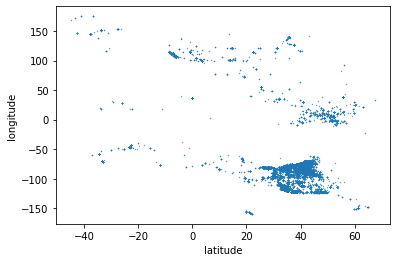

In [37]:
%matplotlib inline
df1.plot.scatter(x='latitude', y='longitude', s=0.1);

## Кластеризация

Представление координат в массиве numpy

In [42]:
import numpy as np
matrix=df1.to_numpy()

In [44]:
print(matrix[0:5,:])

[[  38.8951118  -77.0363658]
 [  33.800745   -84.41052  ]
 [  45.5234515 -122.6762071]
 [  40.764462  -111.904565 ]
 [  33.4483771 -112.0740373]]


In [45]:
from sklearn.cluster import MeanShift

model = MeanShift(bandwidth=0.1).fit(matrix)
clusters = model.cluster_centers_

In [46]:
clusters

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       ...,
       [ -37.8229826 ,  145.1811902 ],
       [ -41.2924945 ,  174.7732353 ],
       [ -45.0311622 ,  168.6626435 ]])

In [47]:
clusters.shape

(3231, 2)

In [48]:
type(clusters)

numpy.ndarray

In [103]:
clusters1=clusters

Координаты офисов

In [49]:
office=np.array([[33.751277, -118.188740],
               [25.867736, -80.324116],
               [51.503016, -0.075479],
               [52.378894, 4.885084],
               [39.366487, 117.036146],
               [-33.868457, 151.205134]])

In [50]:
office

array([[ 3.37512770e+01, -1.18188740e+02],
       [ 2.58677360e+01, -8.03241160e+01],
       [ 5.15030160e+01, -7.54790000e-02],
       [ 5.23788940e+01,  4.88508400e+00],
       [ 3.93664870e+01,  1.17036146e+02],
       [-3.38684570e+01,  1.51205134e+02]])

In [73]:
from matplotlib import pyplot as plt

In [76]:
print(office[0,1])

-118.18874


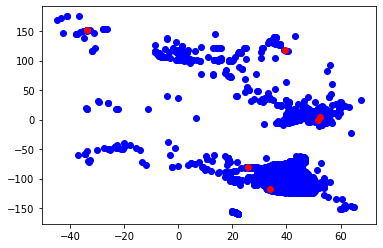

In [80]:
#plt.scatter(office[:,0], office[:,1], c='red')
plt.scatter(clusters[:,0], clusters[:,1], c='blue')
plt.scatter(office[:,0], office[:,1], c='red');

In [65]:
model.labels_.shape

(100001,)

In [81]:
ticker=0
for line in zip(matrix, model.labels_):
    print (line)
    ticker+=1
    if ticker>20:
        break

(array([ 38.8951118, -77.0363658]), 5)
(array([ 33.800745, -84.41052 ]), 7)
(array([  45.5234515, -122.6762071]), 30)
(array([  40.764462, -111.904565]), 65)
(array([  33.4483771, -112.0740373]), 1)
(array([  32.2217429, -110.926479 ]), 23)
(array([ 40.65, -73.95]), 0)
(array([  33.4483771, -112.0740373]), 1)
(array([  33.414768 , -111.9093095]), 2)
(array([ 42.3584308, -71.0597732]), 8)
(array([  33.4483771, -112.0740373]), 1)
(array([  33.414768 , -111.9093095]), 2)
(array([  33.4483771, -112.0740373]), 1)
(array([  33.2486638, -111.6342993]), 137)
(array([  32.8406775, -117.2587935]), 237)
(array([  34.0522342, -118.2436849]), 11)
(array([  33.414768 , -111.9093095]), 2)
(array([  33.4483771, -112.0740373]), 1)
(array([  34.483901 , -114.3224548]), 507)
(array([  34.0489281, -111.0937311]), 45)
(array([  32.7153292, -117.1572551]), 22)


In [82]:
from collections import Counter
print(Counter(model.labels_))

Counter({0: 12506, 1: 4692, 2: 3994, 4: 3527, 3: 3363, 5: 2409, 6: 2297, 7: 1601, 8: 1526, 9: 1378, 10: 1298, 11: 1081, 13: 1007, 12: 1006, 31: 907, 16: 870, 15: 868, 18: 808, 19: 807, 22: 754, 23: 747, 21: 722, 14: 714, 28: 679, 25: 656, 17: 645, 20: 612, 30: 594, 26: 580, 27: 577, 29: 564, 24: 539, 33: 502, 34: 452, 32: 449, 36: 431, 37: 410, 39: 400, 38: 388, 42: 384, 40: 369, 41: 367, 50: 355, 43: 347, 44: 345, 45: 342, 52: 336, 49: 316, 48: 314, 46: 314, 54: 293, 61: 291, 51: 281, 47: 273, 53: 271, 56: 263, 57: 258, 58: 254, 55: 246, 59: 243, 60: 229, 79: 220, 72: 203, 80: 199, 67: 197, 68: 196, 66: 193, 74: 192, 69: 191, 90: 190, 70: 189, 71: 187, 65: 186, 62: 182, 73: 178, 76: 173, 75: 169, 81: 164, 82: 162, 78: 157, 84: 155, 63: 155, 77: 153, 85: 152, 89: 142, 88: 141, 92: 138, 64: 137, 93: 135, 101: 135, 102: 135, 96: 134, 231: 134, 94: 133, 99: 132, 95: 131, 98: 130, 116: 126, 83: 126, 97: 122, 147: 121, 103: 120, 104: 119, 128: 118, 91: 117, 105: 116, 110: 114, 108: 114, 112

In [85]:
c=Counter(model.labels_)
type(c)

collections.Counter

In [104]:
print(len(c))
print(len(clusters1[:,0]))

3231
3231


In [93]:
c[3]

3363

In [119]:
print(type(clusters1[3,:]))
print(type(np.array([c[3]])))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [120]:
np.hstack((clusters1[3,:], np.array([c[3]])))
#np.array([c[3]])

array([  41.87824378,  -87.62984336, 3363.        ])

In [130]:
clusters2=[]
for i in range(len(c)):
    if c[i]>15:
        clusters2.append(np.hstack((clusters1[i,:], c[i])))
clusters3=np.array(clusters2)
print (np.array(clusters2))
print (clusters3.shape)

[[   40.7177164    -73.99183542 12506.        ]
 [   33.44943805  -112.00213969  4692.        ]
 [   33.44638027  -111.90188756  3994.        ]
 ...
 [   41.61853175   -88.44556818    23.        ]
 [   39.2494686    -77.1821271     21.        ]
 [   38.65877915   -76.8856871     19.        ]]
(592, 3)


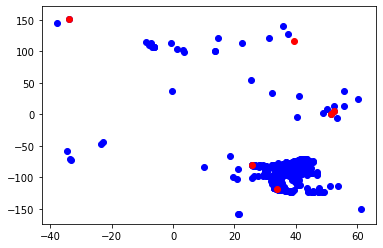

In [131]:
plt.scatter(clusters3[:,0], clusters3[:,1], c='blue')
plt.scatter(office[:,0], office[:,1], c='red');

In [54]:
for i in range(len(office)):
    print(i)

0
1
2
3
4
5


In [170]:
def distance (t1, t2):
    return ((t1[0]-t2[0])**2+(t1[1]-t2[1])**2)

In [171]:
office_index=0
cluster_index=0
s=distance(office[0], clusters3[0])
print(s)
for i in range(len(office)):
    for j in range(len(clusters3)):
        if distance(office[i], clusters3[j])<s:
            s=distance(office[i], clusters3[j])
            office_index=i
            cluster_index=j
print (office[office_index])
print (clusters3[cluster_index])
print(distance(office[office_index], clusters3[cluster_index]))
print(s)

2001.8976523386616
[-33.868457 151.205134]
[-33.86063043 151.20477593  28.        ]
6.138343547438518e-05
6.138343547438518e-05


In [129]:
print(clusters[cluster_index])

[ 28.6404027  -81.34387592]


### Расстояния до различных офисов по номерам

Офис 1:

In [169]:
for i in range(len(clusters3)):
    if distance(clusters3[i], office[0])<1000:
        print(np.hstack((clusters3[i], office[0], distance(clusters3[i], office[0]))))

[  55.74834952   37.62385042   44.           33.751277   -118.18874
  498.86802425]
[  52.5234051    13.4113999    39.           33.751277   -118.18874
  766.10339385]
[  25.2644444   55.3116667   33.          33.751277  -118.18874
  536.8767316]
[  41.00527      28.97696      23.           33.751277   -118.18874
   75.41451726]
[  32.05950188   34.78865671   23.           33.751277   -118.18874
    3.93825973]
[  55.68682618   12.58994255   17.           33.751277   -118.18874
  928.97039325]
[  60.16995389   24.93773012   16.           33.751277   -118.18874
  775.62509711]
[  50.1115118     8.6805059    16.           33.751277   -118.18874
  896.20084626]


In [168]:
print(np.hstack((clusters3[0], office[0], distance(clusters3[0], office[0]))))
print (clusters3[0,0]-office[0,0])
print (clusters3[0,1]-office[0,1])
print ((clusters3[0,0]-office[0,0])**2)
print ((clusters3[0,1]-office[0,1])**2)
print (clusters3[0,0], ' ', office[0,0], ' ',clusters3[0,1], ' ', office[0,1])
print (clusters3[0])
print (office[0])
print (distance (clusters3[0],office[0]))

[   40.7177164    -73.99183542 12506.            33.751277
  -118.18874    11657.1095518 ]
6.966439397275067
44.19690458010329
48.531277875906206
1953.3663744627554
40.71771639727507   33.751277   -73.9918354198967   -118.18874
[   40.7177164    -73.99183542 12506.        ]
[  33.751277 -118.18874 ]
11657.109551802407


Офис 2:

In [146]:
for i in range(len(clusters3)):
    if distance(clusters3[i], office[1])<1000:
        print(np.hstack((clusters3[i], distance(clusters3[i], office[1]))))

[-3.01226200e-01  3.65229641e+01  1.20000000e+02  7.98348468e+02]
[ 52.5234051  13.4113999  39.        865.6850042]
[ 25.2644444   55.3116667   33.         867.30901582]
[ 41.00527     28.97696     23.         238.81220948]
[ 32.05950188  34.78865671  23.         117.92079106]
[ 50.1115118    8.6805059   16.         883.16154355]


Офис 3:

In [147]:
for i in range(len(clusters3)):
    if distance(clusters3[i], office[2])<1000:
        print(np.hstack((clusters3[i], distance(clusters3[i], office[2]))))

[ 55.74834952  37.62385042  44.         210.65409393]
[ 25.2644444   55.3116667   33.         702.96845976]
[ 41.00527  28.97696  23.      617.62587]
[ 32.05950188  34.78865671  23.         657.42004778]
[ 60.16995389  24.93773012  16.         780.8302263 ]


Офис 4:

In [148]:
for i in range(len(clusters3)):
    if distance(clusters3[i], office[3])<1000:
        print(np.hstack((clusters3[i], distance(clusters3[i], office[3]))))

[ 55.74834952  37.62385042  44.         229.06454159]
[ 25.2644444   55.3116667   33.         743.79453282]
[ 41.00527     28.97696     23.         677.00983783]
[ 32.05950188  34.78865671  23.         722.29414401]
[ 60.16995389  24.93773012  16.         813.71808933]


Офис 5:

In [149]:
for i in range(len(clusters3)):
    if distance(clusters3[i], office[4])<1000:
        print(np.hstack((clusters3[i], distance(clusters3[i], office[4]))))

[ 55.74834952  37.62385042  44.         271.40220182]
[ 52.5234051   13.4113999   39.         846.77104026]
[ 25.2644444   55.3116667   33.         453.11636116]
[ 41.00527   28.97696   23.       110.627881]
[32.05950188 34.78865671 23.         74.34856171]
[ 55.68682618  12.58994255  17.         983.33680336]
[ 60.16995389  24.93773012  16.         640.97325968]


Офис 6:

In [150]:
for i in range(len(clusters3)):
    if distance(clusters3[i], office[5])<1000:
        print(np.hstack((clusters3[i], distance(clusters3[i], office[5]))))

[-23.54951835 -46.63821888 116.         269.54731344]
[-22.9035393  -43.2095869   47.         207.48612798]
[-34.61199596 -58.37186536  26.         600.96987133]
